## Rolling 97.5% ES calculation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Parameters ---
WINDOW = 252
ES_LEVEL = 97.5
ES_ALPHA = 1 - ES_LEVEL / 100

# --- Load Data ---
DATA_DIR = "data"
portfolio_returns_path = os.path.join(DATA_DIR, "portfolio_log_returns.csv")
# Load as a DataFrame initially
returns_df = pd.read_csv(portfolio_returns_path, index_col='Date', parse_dates=True)
# Select the Series for calculations
returns_series = returns_df['EqualWeightPortfolio']
print("Successfully loaded portfolio returns.")

Successfully loaded portfolio returns.


Calculating rolling Historical ES (97.5%)...

✅ Historical ES calculation complete.
Preview:
Date
2008-04-10   -0.025539
2008-04-11   -0.027030
2008-04-14   -0.027030
2008-04-15   -0.027030
2008-04-16   -0.027030
Name: HistES_97.5, dtype: float64


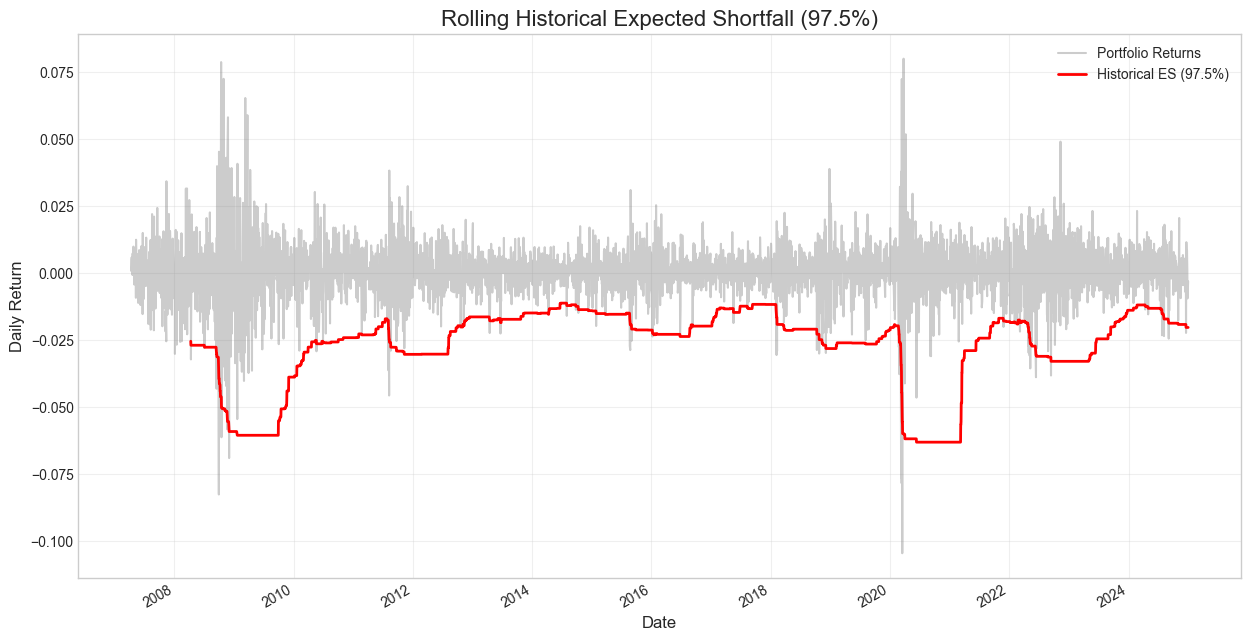

In [5]:
# --- Calculate Rolling Historical ES ---
print("Calculating rolling Historical ES (97.5%)...")
rolling_returns_series = returns_series.rolling(window=WINDOW)

# Calculate the rolling 97.5% VaR (needed as the threshold for ES)
# This will be a Series
historical_var_975_series = returns_series.rolling(window=WINDOW).quantile(ES_ALPHA)

# --- CORRECTED LAMBDA FUNCTION ---
# x is now a Series (the window), compare it directly to the scalar VaR
historical_es_975 = rolling_returns_series.apply(
    lambda x: x[x < historical_var_975_series.loc[x.index[-1]]].mean(),
    raw=False # Use raw=False for correct indexing with .loc
).rename('HistES_97.5') # Rename the resulting Series directly

# Drop initial NaNs
historical_es_975.dropna(inplace=True)

print("\n✅ Historical ES calculation complete.")
print("Preview:")
print(historical_es_975.head())

# --- Plot the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

returns_series.plot(ax=ax, color='gray', alpha=0.4, label='Portfolio Returns')
historical_es_975.plot(ax=ax, color='red', linewidth=2, label='Historical ES (97.5%)') # Plot Series directly

ax.set_title('Rolling Historical Expected Shortfall (97.5%)', fontsize=16)
ax.set_ylabel('Daily Return', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend()
plt.grid(True, alpha=0.3)
plt.show()

hist_es = historical_es_975 # Save the resulting Series